# Gathering Data

In [1]:
import pandas as pd   #importing all necessary packages 
import json
import numpy as np 

In [2]:
data = pd.read_csv('twitter-archive-enhanced.csv')  #reading the csv file into the notebook (first dataset)

In [3]:
data.head()      #checking to see if data has loaded well

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#Saving the tsv file using request and the url provided
import requests
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save tsv to file
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content) 

In [5]:
data_image = pd.read_csv('image_predictions.tsv', sep = '\t')   #reading the tsv file into the notebook (second dataset)

In [6]:
data_image.head()    #checking to see if data has loaded well

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
alltweets = []                                      #reading the tweet-json file into the notebook (third dataset)

with open ('tweet-json.txt', mode = 'r') as file :
    sample_lines = file.readlines()
    for line in sample_lines:
        sample_dict = json.loads(line)
        tweetid = sample_dict['id']
        retweet_count = sample_dict['retweet_count']
        favorite_count = sample_dict['favorite_count']
        alltweets.append({'tweetid':tweetid, 'retweet_count':retweet_count, 'favorite_count':favorite_count})


In [8]:
alltweetsdata = pd.DataFrame(alltweets)    #checking to see if data has loaded well
alltweetsdata.head()

,tweetid,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing Data: Quality Issues

### Visual Assessment

In [9]:
data     #loading data for visual assessment

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


*Quality Issues* (twitter-archive-enhanced table):
<ul>
 <li>There are numerous missing values in the dataset</li>
 <li>The removal of retweets and replies to get only the original ratings</li>
 <li>Some missing records in doggo,floofer, pupper and puppo columns showing as 'None instead of NaN</li>
 </ul>

In [10]:
data_image    #loading data for inspection

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


*Quality Issues* (image_predictions table):
<ul>
 <li>Inconsistency in the spelling of names in p1,p2 and p3. That is some names are spelt starting with a capital letter 
    while others start with small letters</li>
 </ul>

In [11]:
alltweetsdata       #loading data for inspection

,tweetid,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


*Quality Issues* (tweets-json table):
<ul>
 <li>I will rename 'tweetid' to 'tweet_id' for consistency and merging purposes.</li>
 </ul>

### Programmatic Assessment

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
data.timestamp.dtype

dtype('O')

In [15]:
data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
data.duplicated().sum()

0

*Quality Issues* (twitter-archive-enhanced table):
<ul>
 <li>Columns such as (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, 
    retweeted_status_timestamp, expanded_urls, name) will not be used in the analysis and they contain numerous missing values 
    as well</li>
 <li>The timestamp column is of object data type instead of datetime</li>
 <li>The rating_numerator and rating_denominator have some outliers in them</li>
 <li>The rating_numerator column is of type integer but some of the ratings need to be decimals. Due to incorrect extraction, this column is currently of integer type</li>
 </ul>

In [17]:
data_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
data_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
368,672968025906282496,https://pbs.twimg.com/media/CVbc2V2WsAE3-kn.jpg,1,toy_poodle,0.678046,True,miniature_poodle,0.160273,True,Airedale,0.065649,True
717,685663452032069632,https://pbs.twimg.com/ext_tw_video_thumb/68566...,1,Chesapeake_Bay_retriever,0.171174,True,tennis_ball,0.090644,False,racket,0.048508,False
718,685667379192414208,https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg,1,sliding_door,0.344526,False,doormat,0.190027,False,washbasin,0.046326,False
1890,848690551926992896,https://pbs.twimg.com/media/C8cnjHuXsAAoZQf.jpg,1,flat-coated_retriever,0.823648,True,Newfoundland,0.100571,True,groenendael,0.038310,True
132,668466899341221888,https://pbs.twimg.com/media/CUbfGbbWoAApZth.jpg,1,shopping_basket,0.398361,False,hamper,0.363222,False,bassinet,0.084173,False
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
1475,780476555013349377,https://pbs.twimg.com/tweet_video_thumb/CtTFZZ...,1,pug,0.919255,True,French_bulldog,0.032350,True,bull_mastiff,0.028468,True
2039,884925521741709313,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,1,Italian_greyhound,0.259916,True,American_Staffordshire_terrier,0.198451,True,Staffordshire_bullterrier,0.127725,True
589,679132435750195208,https://pbs.twimg.com/media/CWzDWOkXAAAP0k7.jpg,1,Scottish_deerhound,0.194610,True,Irish_wolfhound,0.162855,True,giant_schnauzer,0.159837,True
361,672828477930868736,https://pbs.twimg.com/media/CVZd7ttWcAEs2wP.jpg,1,sandbar,0.118154,False,stingray,0.075915,False,seashore,0.075125,False


In [19]:
alltweetsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweetid         2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [20]:
alltweetsdata.describe()

,tweetid,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [21]:
alltweetsdata.duplicated().sum()

0

*Quality Issues* (tweets-json table):
<ul>
 <li>No data quality issue detected using programmatic assessment</li>
</ul> 

# Assessing Data: Tidiness Issues

In [22]:
data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Visual Assessment (twitter-archive-enhanced table):
<ul>
 <li>The last four columns (doggo,floofer, pupper, puppo) should represent observations for each dog hence must be recorde as rows instead of column names</li>
 <li>The timestamp column contains two variables (date and time) but each variable is supposed to form a stand alone column 
</ul>

### Final Assessment Issues Identified:
<ul>
 <li>There are numerous missing values in the dataset</li>
 <li>The removal of retweets and replies to get only the original ratings</li>
 <li>Some missing records in doggo,floofer, pupper and puppo columns showing as 'None instead of NaN</li>
 <li>Inconsistency in the spelling of names in p1,p2 and p3. That is some names are spelt starting with a capital letter 
    while others start with small letters</li>
 <li>I will rename 'tweetid' to 'tweet_id' for consistency and merging purposes.</li>
 <li>Columns such as (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, 
    retweeted_status_timestamp, expanded_urls,name) will not be used in the analysis and they contain numerous missing values 
    as well</li>
 <li>The timestamp column is of object data type instead of datetime</li>
 <li>The rating_numerator and rating_denominator have some outliers in them</li>
<li>The rating_numerator column is of type integer but some of the ratings need to be decimals. Due to incorrect extraction, this column is currently of integer type</li>
 <li>The last four columns (doggo,floofer, pupper, puppo) should represent observations for each dog hence must be recorde as rows instead of column names</li>
 <li>The timestamp column contains two variables (date and time) but each variable is supposed to form a stand alone column 
</ul>

# Cleaning Data

This section is about cleaning the various data quality and tidiness issues identified above. I will first of all make copies of the original datasets so that I can be able to assess them later. 

In [23]:
data_clean = data.copy()                            #Making copies of all the datasets
data_image_clean = data_image.copy()
alltweetsdata_clean = alltweetsdata.copy()

### Define
<ul>
 <li>I will remove all retweets and replies that are not part of the original ratings for the dogs</li>
 <li>I will drop all columns with missing values as they are not really needed for the analysis</li>
 <li>I will extract the numerator again from the 'text' column using a regular expression and covert it to float datatype</li>
 <li>I will drop the None values of the doggo,floofer, pupper and puppo columns when I combine them</li>
</ul>

### Code

In [24]:
#removing retweets and replies that are not original ratings
data_clean = data_clean[data_clean['retweeted_status_id'].isna()]

In [25]:
#extracting the rating numerator column with the correct decimal values
data_clean['rating_numerator1'] = data_clean.text.str.extract(r'(\d+\.?\d*?(?=/10))')

In [26]:
data_clean['rating_numerator1']  = data_clean['rating_numerator1'].astype(float)


In [27]:
#I will drop all columns with missing values as they are not really needed for the analysis
data_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id',
                 'retweeted_status_timestamp', 'name','expanded_urls','rating_numerator', 'rating_denominator'], 
                axis=1, inplace=True)  

In [28]:
data_clean.rename(columns = {'rating_numerator1':'rating_numerator'}, inplace = True) #renaming the 'tweetid' column 

### Test

In [29]:
data_clean.info()  # the retweets and replies that are not original ratings have been cleaned and all the columns 
            # specified have been dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2175 non-null   int64  
 1   timestamp         2175 non-null   object 
 2   source            2175 non-null   object 
 3   text              2175 non-null   object 
 4   doggo             2175 non-null   object 
 5   floofer           2175 non-null   object 
 6   pupper            2175 non-null   object 
 7   puppo             2175 non-null   object 
 8   rating_numerator  2159 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 169.9+ KB


In [30]:
data_clean['rating_numerator'].value_counts()

12.00      500
10.00      443
11.00      426
13.00      309
9.00       156
8.00        98
7.00        53
14.00       44
5.00        34
6.00        32
3.00        19
4.00        15
2.00         9
1.00         7
420.00       2
0.00         2
9.75         1
666.00       1
17.00        1
13.50        1
15.00        1
1776.00      1
182.00       1
9.50         1
11.26        1
11.27        1
Name: rating_numerator, dtype: int64

### Define
<ul>
 <li>I will use the string lower method to convert all column values in p1,p2, and p3 to lower cases for consistency purposes </li>
</ul>

### Code

In [31]:
#I will use the string lower method to convert all column values in p1,p2, and p3 to lower cases for consistency purposes
data_image_clean['p1']= data_image_clean['p1'].str.lower()
data_image_clean['p2']= data_image_clean['p2'].str.lower()
data_image_clean['p3']= data_image_clean['p3'].str.lower()


### Test

In [32]:
data_image_clean #checking to confirm changes

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


### Define
<ul>
 <li>I will rename the 'tweetid' to 'tweet_id'</li>
</ul>

### Code

In [33]:
alltweetsdata_clean

,tweetid,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [34]:
 alltweetsdata_clean.rename(columns = {'tweetid':'tweet_id'}, inplace = True) #renaming the 'tweetid' column

### Test

In [35]:
alltweetsdata_clean      #tweet_id has been renamed.

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Define
<ul>
 <li>The columns mentioned above have been dropped earlier when I dealt with the missing value issues in them</li>
 <li>I will change the timestamp column from object datatype to datetime</li>
 <li>I will use the interquartile range method to determine the lower and upper boundaries of the 'rating_numerator' and 
    'rating_denominator' columns, then I will use the mask method to replace all values below or above these boundaries 
    with 0.</li>
</ul>

### Code

*Changing the timestamp column from object datatype to datetime*

In [36]:
#I will change the timestamp column from object datatype to datetime
data_clean['timestamp']= pd.to_datetime(data_clean['timestamp'])

### Test

<AxesSubplot:>

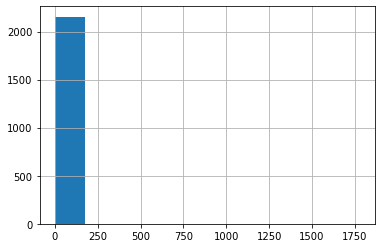

In [37]:
data_clean['rating_numerator'].hist()  

In [38]:
data_clean['rating_numerator'].describe()

count    2159.000000
mean       12.210875
std        42.596043
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

*Cleaning the 'rating_numerator' column outliers*

In [39]:
#I will remove the outliers using Interquartile Range (IQR). ie 1.5*IQR. I will remove all observations that are higher
#or lower than the 1.5*IQR. 
#Calculating the IQR:
Q1= data_clean['rating_numerator'].quantile(0.25)           # where Q3 is the 75% and Q1 is the 25% of the values in the column. 
Q3= data_clean['rating_numerator'].quantile(0.75) 
IQR = Q3-Q1

#Calculating the lower and upper boundaries to determine the cutoff limits.
lower_boundary = Q1-1.5*IQR    
upper_boundary = Q3+1.5*IQR 
lower_boundary, upper_boundary

(7.0, 15.0)

In [40]:
#Replacing the outliers with the mean for the column. 
data_clean['rating_numerator'].mask(data_clean['rating_numerator']<lower_boundary, 12.21, inplace = True)
data_clean['rating_numerator'].mask(data_clean['rating_numerator']>upper_boundary, 12.21, inplace = True)

data_clean['rating_numerator'].describe()

count    2159.000000
mean       11.066383
std         1.541402
min         7.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        15.000000
Name: rating_numerator, dtype: float64

In [41]:
#dropping the 0 values in the rating_numerator
#data_clean.rating_numerator.replace(0,np.nan, inplace =True)
#data_clean.rating_numerator.dropna(inplace = True)

In [42]:
data_clean.rating_numerator.value_counts()

12.00    500
10.00    443
11.00    426
13.00    309
9.00     156
12.21    124
8.00      98
7.00      53
14.00     44
13.50      1
15.00      1
9.75       1
11.27      1
9.50       1
11.26      1
Name: rating_numerator, dtype: int64

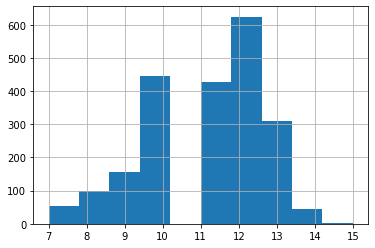

In [43]:
data_clean['rating_numerator'].hist(); 

*Cleaning the 'rating_denominator' column outliers*

### Cleaning the Tidiness Issues Identified

### Define
<ul>
 <li>I will combine the last four columns in this table into one column named 'dog_stage' using the pandas replace and concatenate functions</li>
 <li>I will change the timestamp column from object datatype to datetime</li>
</ul>


### Code

*Combining the last four columns into one*

In [44]:
data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'doggo', 'floofer', 'pupper',
       'puppo', 'rating_numerator'],
      dtype='object')

In [45]:
data_clean.doggo.replace('None','', inplace =True)  #replacing the none values with empty string
data_clean.floofer.replace('None','', inplace =True)
data_clean.pupper.replace('None','', inplace =True)
data_clean.puppo.replace('None','', inplace =True)



In [46]:
#concatenating the four columns to form the dog_stage column
data_clean['dog_stage'] = data_clean.doggo + data_clean.floofer + data_clean.pupper + data_clean.puppo

In [47]:
data_clean.dog_stage.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [48]:
data_clean['dog_stage'].replace('',np.nan, inplace =True)

### Test

In [49]:
data_clean['dog_stage'].value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

*Splitting the timestamp column into date and time*

In [50]:
data_clean['date'] = pd.to_datetime(data_clean['timestamp']).dt.date
data_clean['time'] = pd.to_datetime(data_clean['timestamp']).dt.time

### Merging all the Datasets

In [51]:
data_clean
data_image_clean
alltweetsdata_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [52]:
data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'doggo', 'floofer', 'pupper',
       'puppo', 'rating_numerator', 'dog_stage', 'date', 'time'],
      dtype='object')

In [53]:
data_clean.drop(['timestamp','source', 'doggo','floofer','pupper','puppo', 'time'], axis=1, inplace=True)  

In [54]:
data_clean

,tweet_id,text,rating_numerator,dog_stage,date
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.00,NaN,2017-08-01
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.00,NaN,2017-08-01
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.00,NaN,2017-07-31
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.00,NaN,2017-07-30
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.00,NaN,2017-07-29
...,...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,12.21,NaN,2015-11-16
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,12.21,NaN,2015-11-16
2353,666033412701032449,Here is a very happy pup. Big fan of well-main...,9.00,NaN,2015-11-15
2354,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7.00,NaN,2015-11-15


In [55]:
data_clean['dog_stage'].value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [56]:
data_image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [57]:
data_image_clean.drop(['img_num', 'p1','p1_conf','p1_dog', 'p2','p2_conf','p2_dog', 'p3','p3_conf', 'p3_dog'], 
                      axis=1, inplace=True)  


In [58]:
alltweetsdata_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [59]:
#combining the data_clean1 with the data_image_clean tables
data_clean_image = data_clean.merge(data_image_clean, how = 'inner', on ='tweet_id')

#combining the data_clean_image with the alltweetsdata_clean tables
master_data_clean = data_clean_image.merge(alltweetsdata_clean, how = 'inner', on ='tweet_id') 
master_data_clean

,tweet_id,text,rating_numerator,dog_stage,date,jpg_url,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.00,NaN,2017-08-01,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,8853,39467
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.00,NaN,2017-08-01,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,6514,33819
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.00,NaN,2017-07-31,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,4328,25461
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.00,NaN,2017-07-30,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,8964,42908
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.00,NaN,2017-07-29,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,9774,41048
...,...,...,...,...,...,...,...,...
1989,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,12.21,NaN,2015-11-16,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,41,111
1990,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,12.21,NaN,2015-11-16,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,147,311
1991,666033412701032449,Here is a very happy pup. Big fan of well-main...,9.00,NaN,2015-11-15,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,47,128
1992,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7.00,NaN,2015-11-15,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,48,132


In [60]:
#changing the datatype of dates from object to datetime
master_data_clean['date']= pd.to_datetime(master_data_clean['date'])

#changing the datatype of dog_stage from object to category
master_data_clean['dog_stage'] = master_data_clean.dog_stage.astype('category')

In [61]:
master_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1994 non-null   int64         
 1   text              1994 non-null   object        
 2   rating_numerator  1981 non-null   float64       
 3   dog_stage         306 non-null    category      
 4   date              1994 non-null   datetime64[ns]
 5   jpg_url           1994 non-null   object        
 6   retweet_count     1994 non-null   int64         
 7   favorite_count    1994 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 126.9+ KB


In [62]:
master_data_clean

,tweet_id,text,rating_numerator,dog_stage,date,jpg_url,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.00,NaN,2017-08-01,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,8853,39467
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.00,NaN,2017-08-01,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,6514,33819
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.00,NaN,2017-07-31,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,4328,25461
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.00,NaN,2017-07-30,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,8964,42908
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.00,NaN,2017-07-29,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,9774,41048
...,...,...,...,...,...,...,...,...
1989,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,12.21,NaN,2015-11-16,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,41,111
1990,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,12.21,NaN,2015-11-16,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,147,311
1991,666033412701032449,Here is a very happy pup. Big fan of well-main...,9.00,NaN,2015-11-15,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,47,128
1992,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7.00,NaN,2015-11-15,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,48,132


### Storing Data

In [63]:
#storing the master data into csv
master_data_clean.to_csv('twitter_archive_master.csv', index= False) 

### Analyzing and Visualizing Data

*These are the insights I am looking to find in the data:*
<ul>
 <li>The dog_stage with the highest retweet_count and favourite count</li>
 <li>The dog_stage with the highest rating numerator on average</li>
 <li>Correlation between rating_numerator and retweet_count,favorite_count</li>
 <li>Visualize the text column using wordcloud to fine the summary of all the text</li>
</ul>

In [64]:
master_data = pd.read_csv('twitter_archive_master.csv')

In [65]:
master_data.shape

(1994, 8)

In [66]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1994 non-null   int64  
 1   text              1994 non-null   object 
 2   rating_numerator  1981 non-null   float64
 3   dog_stage         306 non-null    object 
 4   date              1994 non-null   object 
 5   jpg_url           1994 non-null   object 
 6   retweet_count     1994 non-null   int64  
 7   favorite_count    1994 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 124.8+ KB


In [67]:
master_data.dog_stage.value_counts()

pupper          203
doggo            63
puppo            22
doggopupper       9
floofer           7
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [68]:
#the dog_stage with the highest retweet_count and favourite count
master_data.groupby('dog_stage')['retweet_count','favorite_count'].max().sort_values(['retweet_count',
                                                                                      'favorite_count'], ascending = False)


C:\Users\HP PAVILION\AppData\Local\Temp\ipykernel_15872\482682429.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  master_data.groupby('dog_stage')['retweet_count','favorite_count'].max().sort_values(['retweet_count',


,retweet_count,favorite_count
dog_stage,,
doggo,79515,131075
puppo,48265,132810
pupper,32883,106827
doggopuppo,19196,47844
floofer,18497,33345
doggopupper,17621,44619
doggofloofer,3433,17169


From the analysis above, the dog stage with the highest retweet_count is doggo with a total retweet of 79515 while puppo is
the dog stage with the most favorite count with a total of 132810 favorite count. 

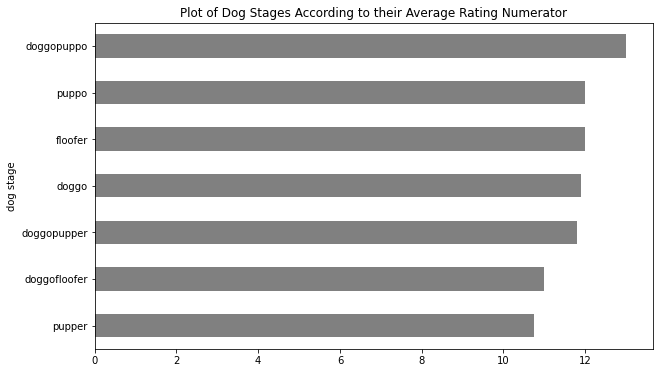

In [69]:
#the dog_stage with the highest rating numerator on average
master_data.groupby('dog_stage')['rating_numerator'].mean().sort_values(ascending = True).\
plot.barh(color='gray', xlabel = 'dog stage', ylabel = 'rating numerator', figsize = (10,6), 
          title = 'Plot of Dog Stages According to their Average Rating Numerator');

                                                                                      

On average, doggopuppo dog stage gets the highest rating numerators. 

In [70]:
#correlation between rating_numerator and retweet_count
master_data['rating_numerator'].corr(master_data['retweet_count'])

0.3380241605171216

There is relative low correlation between the rating numerator and the retweet count

In [71]:
#correlation between rating_numerator and favorite_count
master_data['rating_numerator'].corr(master_data['favorite_count'])

0.44523820628244537

There is positive correlation between rating_numerator and favorite_count. This implies that there is an association between
higher rating_numerator and the favorite_count.

In [72]:
#visualizing the text column using wordcloud to find the summary of all the text.
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

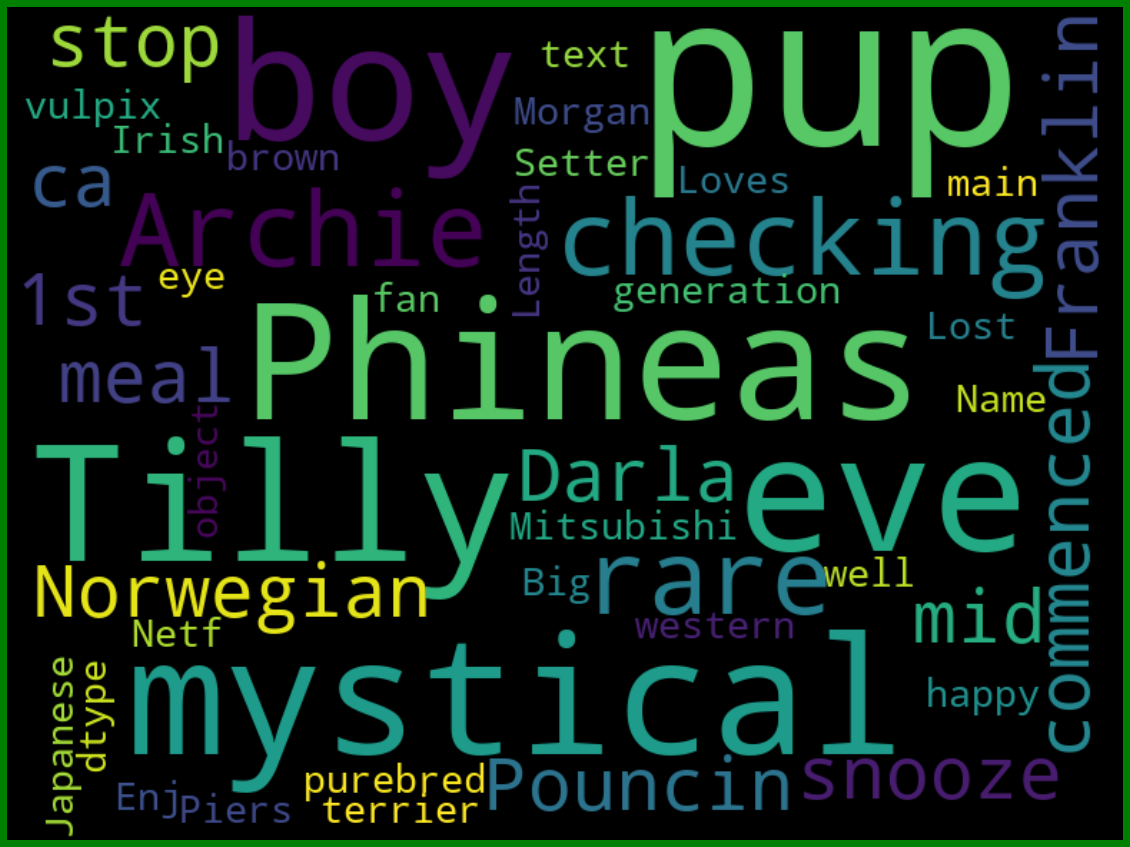

In [73]:
stopwords = set(STOPWORDS)
mask = np.array(Image.open('dog.png'))

def dogwordcloud(data, title = None) :
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=2000,
        max_font_size=50,
        scale=3,
        random_state=42,
        width=mask.shape[1],
        height=mask.shape[0],
        mask=mask
    ).generate(str(data))
    
    fig = plt.figure(figsize=(20,20), facecolor=('green'))
    plt.axis('off')
    
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()
                          
                          
dogwordcloud(master_data['text'])

### References:
The following list are the sources of information I consulted in the course of doing this assignment:
1. [Kaggle](https://www.kaggle.com/general/218717)
2. [wikipedia](https://en.wikipedia.org/wiki/Imputation_(statistics))
3. [stack overflow](https://stackoverflow.com/questions/50461349/how-to-remove-outlier-from-dataframe-using-iqr)
4. [stack overflow](https://stackoverflow.com/questions/39512002/convert-whole-dataframe-from-lower-case-to-upper-case-with-pandas)
5. [sparkbyexamples.com](https://sparkbyexamples.com/pandas/pandas-replace-values-based-on-condition/)
6. [CXL](https://cxl.com/blog/outliers/)
7. [Github](https://github.com/kosta93/Batman_wordcloud)
8. [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)
9. [Towardsdatascience](https://towardsdatascience.com/3-key-differences-between-merge-and-concat-functions-of-pandas-ab2bab224b59#:~:text=Concat%20function%20concatenates%20dataframes%20along,combinations%20based%20on%20a%20condition.)
10.[Youtube](https://www.youtube.com/watch?v=4N_exdTyGHk)
10.[Youtube](https://www.youtube.com/watch?v=f1TJXu5H8ZM&list=LL&index=2&t=590s)
10.[Google](https://www.google.com/search?q=how+to+insert+emoji+in+jupyter+notebook&oq=how+to+add+emoji+in+jupyter&aqs=chrome.1.69i57j0i22i30j0i390l3.20407j0j7&sourceid=chrome&ie=UTF-8)

END🦋